<img src="https://www.mines.edu/webcentral/wp-content/uploads/sites/267/2019/02/horizontallightbackground.jpg" width="100%"> 

### CSCI250 Python Computing: Building a Sensor System
<hr style="height:5px" width="100%" align="left">

# LAB: Numeric integration
## Jacob States

# Introduction

The goal of this lab is to compute the definite integral of an arbitrary function for different numeric schemes using only 
* `numpy` arrays (no lists)
* **vectorized calculations** (no loops).

<img src="https://www.dropbox.com/s/u628vjn2uc5h3ua/notebook.png?raw=1" width="10%" align="right">

Read through
* the  [`numpy` notebook](s_NpIntro.ipynb)
* the  [1D arrays notebook](s_NpArrays1D.ipynb) 
* the  [1D plot notebook](s_NpPlots1D.ipynb)
* the  [vectorization notebook](s_NpVectorization.ipynb)

# Definite integrals

Compute the definite integral of a function $f(t)$ on the interval $[a,b]$

$$ I = \int_a^b f(t) dt $$

by midpoint and trapezoid approximations using $n$ intervals of equal width $\Delta t$. 

The primary difference between these approximations consists in how we evaluate the area under the function within each discretization interval.

# Midpoint rule

Let $m_k$ represent the middle value of the $k$-th integration interval:

$$ m_k = a + \left(k+\frac{1}{2} \right) \frac{b-a}{n} $$

where $0 \le k \le n-1$. 

In [1]:
import numpy as np
a,b,n = 0,10,5
dt = (b-a) / n

k = np.arange(n)
mk = a + (k + 0.5) * dt
print(mk)

[1. 3. 5. 7. 9.]


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Integration_rectangle.svg/1920px-Integration_rectangle.svg.png">

[more info](http://www.math.pitt.edu/~sparling/23021/23022numapprox2/node4.html)

* The integral approximation is
$$ I_m \approx \frac{b-a}{n} \sum_{k=0}^{n-1} f(m_k) .$$

* The integration error is
$$ E_m \le \frac{K}{24 n^2} (b-a)^3 .$$
where $K$ is the max of $|f''(t)|$ on the interval $(a,b)$.

* The number of terms required to achieve tolerance $s$ is
$$ N_m \ge \sqrt{\frac{K(b-a)^3}{24s} } .$$

# Trapezoid rule

Let $t_k$ represent the edge of the $k$-th integration interval:

$$ t_k = a + k \frac{b-a}{n}$$

where $0 \le k \le n$. 

In [2]:
import numpy as np
a,b,n = 0,10,5
dt = (b-a)/n

k = np.arange(n+1)
tk = a + k * dt
print(tk)

[ 0.  2.  4.  6.  8. 10.]


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/03/Integration_trapezoid.svg/1920px-Integration_trapezoid.svg.png">

[more info](http://www.math.pitt.edu/~sparling/23021/23022numapprox2/node2.html)

* The integral approximation is
$$ I_t \approx \frac{b-a}{2n} 
\left[
f(t_0) + 
\left(
\sum_{k=1}^{n-1} 2f(t_k) 
\right) +
f(t_n)
\right].
$$

* The integration error is 
$$ E_t \le \frac{K}{12 n^2} (b-a)^3 .$$
where $K$ is the max of $|f''(t)|$ on the  interval $(a,b)$.

* The number of terms required to achieve tolerance $s$ is
$$ N_t \ge \sqrt{\frac{K(b-a)^3}{12s} } .$$

### Instructions (1)

* Define functions approximating $f(t)$ and $f''(t)$:
    * You may choose any function, e.g. $sin(t)$.
    * Compute its analytic 2nd derivative , e.g. $-sin(t)$.

* Define the integration interval:
    * Choose values for $[a,b]$, e.g. $[0,\pi]$.

* Define the number of integration intervals:
    * Choose $n$, e.g. $n=9$.
    * Define an array for index $k$ from $0$ to $n$.

### Instructions (2)
* Define the coordinates $m_k$ or $t_k$ where to evaluate the function $f(t)$ during integration:
    * Divide the interval $[a,b]$ in equal segments.
    * Choose the middle or the left end of the segments.
* Display the integral and its error with 4 significant figures.
* Use vectorized `numpy` calculations (do not use explicit loops).

# Assignment

* Calculate the definite integral of the function $f(t)$.
* Use both midpoint and trapezoid rules.
* Calculate the integral error $E$.
* Calculate the number of interval needed to achieve a tolerance of 0.0001.
* Graph the integral value versus the number of intervals.

## Extra credit
* Implement another numeric integration scheme, different from midpoint and trapezoid.

Midpoint integral approx: 1.9998982134334127 
 Number of intervals:  201 
 Actual Integral Value: 2.0 
 Actual Error: 0.00010178656658732521 
 Minimum Midpoint Error, Em:  9.971097819239551e-05 
 Tolerance:  0.0001 
 Number of terms to meet tolerance:  200.7093229013284


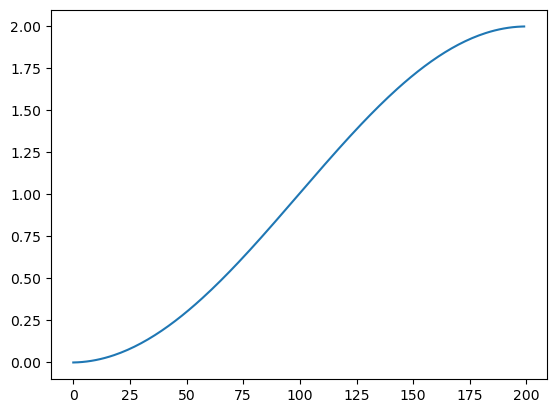

In [3]:
# Import Modules
import numpy as np
import matplotlib.pyplot as plt

# Define f(t), f''(t), and interval
a, b = 0, np.pi
n = 201

dt = (b-a) / n
k = np.arange(n-1)
mk = a + (k + 0.5) * dt

F = -np.cos(mk)
f = np.sin(mk)
f_p = np.cos(mk)
f_2p = - np.sin(mk)

# Midpoint Rule

I_m = np.sum(f*dt)
F_a = -np.cos(b) + np.cos(a)

# Midpoint E
i = b-a
Km = np.max(mk)
Em = (Km)*(i**3)/(24*(n**2))

# Midpoint Tolerance Terms
s = 0.0001 # tolerance
N_m = np.sqrt((Km)*(i**3)/(24*s))

print('Midpoint integral approx:',I_m,'\n','Number of intervals: ',n, '\n','Actual Integral Value:',F_a,'\n','Actual Error:',F_a - I_m,'\n', 'Minimum Midpoint Error, Em: ',Em, '\n', 'Tolerance: ', s, '\n', 'Number of terms to meet tolerance: ', N_m)

plt.plot(np.cumsum(f*dt))

Trapazoidal integral approx: 1.9997760691307878 
 Number of intervals:  201 
 Actual Integral Value: 2.0 
 Actual Error: 0.00022393086921224103 
 Minimum Trapazoidal Error, Et:  0.0002014211739926586 
 Tolerance:  0.0001 
 Number of terms to meet tolerance:  285.2650846226611


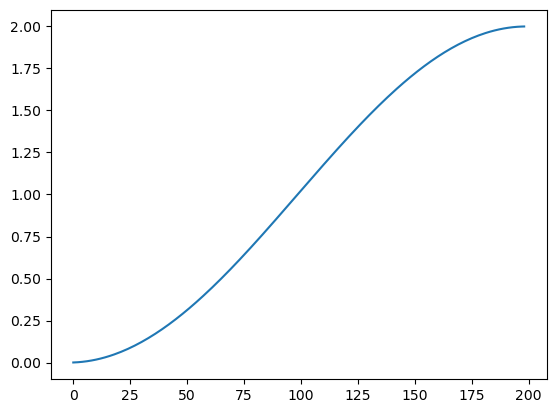

In [4]:
# Define f(t), f''(t), and interval
a, b = 0, np.pi
n = 201

dt_t = (b-a) / (2*n)
k = np.arange(n+1)
tk = a + (k + 0.5) * dt

F_t = -np.cos(tk)
f_t = np.sin(tk)
f_pt = np.cos(tk)
f_2pt = - np.sin(tk)

# Trapazoidal Rule

I_t = dt_t*(f_t[0] + np.sum(2*f_t[1:n-1]) + f_t[n])
F_a = -np.cos(b) + np.cos(a)

# Trapazoidal Error
i = b-a
Kt = np.max(tk)
Et = (Kt)*(i**3)/(12*(n**2))

# Trapazoidal Tolerance Terms
s = 0.0001 # tolerance
N_t = np.sqrt((Kt)*(i**3)/(12*s))

print('Trapazoidal integral approx:',I_t,'\n','Number of intervals: ',n, '\n','Actual Integral Value:',F_a,'\n','Actual Error:',F_a - I_t,'\n', 'Minimum Trapazoidal Error, Et: ',Et, '\n', 'Tolerance: ', s, '\n', 'Number of terms to meet tolerance: ', N_t)
plt.plot(dt_t*(f_t[0] + f_t[n] + np.cumsum(2*f_t[1:n-1])))

# Post lab

<img src="http://www.dropbox.com/s/fcucolyuzdjl80k/todo.jpg?raw=1" width="10%" align="right">

Before you submit the lab, make sure everything works as you expect by restarting the kernel: select **Kernel > Restart & Run All**.

Answer the following questions.
1. What elements of this lab did you find easy/challenging?
    * Im still unsure about useing some of the extra parameters for the numpy functions. I just need practice.
2. What did you like/dislike about this lab?
    * I like looking and building processes that computers go through to calculate numbers.
3. If you did anything worthy of extra credit, tell us about it here!
    * None

# Submit
* Make sure to update your name and department in the top markdown cell.

* Rename the Jupyter notebook with the following convention:
**SL?-FirstLast.ipynb** (replace ? with the lab number)

* Turn in your Jupyter notebook on Canvas. Email submissions don't count.

# Honor code
Unless explicitly specified, labs are **individual exercises**. Your submission is subject to the [**Mines Honor Code**](http://inside.mines.edu/~epoeter/_GW/CSMHonorCodeUndergradHandbook.pdf).